# Working with Regions

Regions are rectangular areas on a page that let you focus on specific parts of a document. They're perfect for extracting text from defined areas, finding elements within certain boundaries, and working with document sections.

In [1]:
#%pip install "natural-pdf[all]"

In [2]:
from natural_pdf import PDF

# Load a PDF
pdf = PDF("https://github.com/jsoma/natural-pdf/raw/refs/heads/main/pdfs/01-practice.pdf")
page = pdf.pages[0]

# Create a region in the top portion of the page
top_region = page.create_region(
    50,          # x0 (left)
    50,          # y0 (top)
    page.width - 50,  # x1 (right)
    200          # y1 (bottom)
)

# Visualize the region
top_region.show(color="blue", label="Top Region")

# Extract text from this region
top_region.extract_text()

'Site:  Durham’s Meatpacking Chicago, Ill. Date:  February 3, 1905 Violation Count:  7 Summary:  Worst of any, however, were the fertilizer men, and those who served in the cooking rooms. These people could not be shown to the visitor - for the odor of a fertilizer man would scare any ordinary  visitor at a hundred yards, and as for the other men, who worked in tank rooms full of steam, and in  some of which there were open vats near the level of the floor, their peculiar trouble was that they fell'

## Creating Regions from Elements

In [3]:
# Find an element to create regions around
title = page.find('text:contains("Jungle Health")')

# Create regions relative to this element
below_title = title.below(height=100)
right_of_title = title.right(width=200) 
above_title = title.above(height=50)

# Visualize these regions
below_title.show(color="green", label="Below")
right_of_title.show(color="red", label="Right")
above_title.show(color="orange", label="Above")

# Extract text from the region below the title
below_title.extract_text()

'INS-UP70N51NCL41R Site:  Durham’s Meatpacking Chicago, Ill. Date:  February 3, 1905 Violation Count:  7'

## Finding Elements Within Regions

In [4]:
# Create a region for a specific document section
form_region = page.create_region(50, 100, page.width - 50, 300)

# Find elements only within this region
labels = form_region.find_all('text:contains(":")') 

# Visualize the region and the elements found
form_region.show(color=(0, 0, 1, 0.2), label="Form Region")
labels.show(color="purple", label="Labels")

# Count the elements found
len(labels)

3

## Expanding and Adjusting Regions

In [5]:
# Find an element to work with
element = page.find('text:contains("Summary:")')

# Create a tight region around the element
tight_region = page.create_region(
    element.x0, element.top, 
    element.x1, element.bottom
)

# Expand it to include surrounding content
expanded_region = tight_region.expand(
    left=10,       # Expand 10 points to the left
    right=200,     # Expand 200 points to the right
    top_expand=5,  # Expand 5 points above
    bottom_expand=100  # Expand 100 points below
)

# Visualize both regions
tight_region.show(color="red", label="Original")
expanded_region.show(color="blue", label="Expanded")

# Extract the content from the expanded region
expanded_region.extract_text()

'Summary:  These people could not be shown to the visitor - for the odor of a fertilizer man would scare any ordinary  visitor at a hundred yards, and as for the other men, who worked in tank rooms full of steam, and in  some of which there were open vats near the level of the floor, their peculiar trouble was that they fell into the vats; and when they were fished out, there was never enough of them left to be worth  exhibiting - sometimes they would be overlooked for days, till all but the bones of them had gone out to the world as Durham’s Pure Leaf Lard!'

## Creating Bounded Regions

In [6]:
# Find two elements to serve as boundaries
start_elem = page.find('text:contains("Summary:")')
end_elem = page.find('text:contains("Statute")')

# Create a region from start to end element
bounded_region = start_elem.until(end_elem)

# Visualize the bounded region
bounded_region.show(color="green", label="Bounded Region")

# Extract text from this bounded region
bounded_region.extract_text()[:200] + "..." if len(bounded_region.extract_text()) > 200 else bounded_region.extract_text()

'Jungle Health and Safety Inspection Service INS-UP70N51NCL41R Site:  Durham’s Meatpacking Chicago, Ill. Date:  February 3, 1905 Violation Count:  7 Summary:  Worst of any, however, were the fertilizer...'

## Working with Multiple Regions

In [7]:
# Define multiple regions to extract different parts of the document
header_region = page.create_region(0, 0, page.width, 100)
main_region = page.create_region(100, 100, page.width - 100, page.height - 150)
footer_region = page.create_region(0, page.height - 50, page.width, page.height)

# Visualize all regions
header_region.show(color="blue", label="Header")
main_region.show(color="green", label="Main Content")
footer_region.show(color="red", label="Footer")

# Extract content from each region
document_parts = {
    "header": header_region.extract_text(),
    "main": main_region.extract_text()[:100] + "...",
    "footer": footer_region.extract_text()
}

# Show what we extracted
document_parts

{'header': 'Jungle Health and Safety Inspection Service INS-UP70N51NCL41R Site:  Durham’s Meatpacking Chicago, Ill.',
 'main': 'February 3, 1905 7 Worst of any, however, were the fertilizer men, and those who served in the cooki...',
 'footer': 'Jungle Health and Safety Inspection Service'}

## Creating an Image of a Region

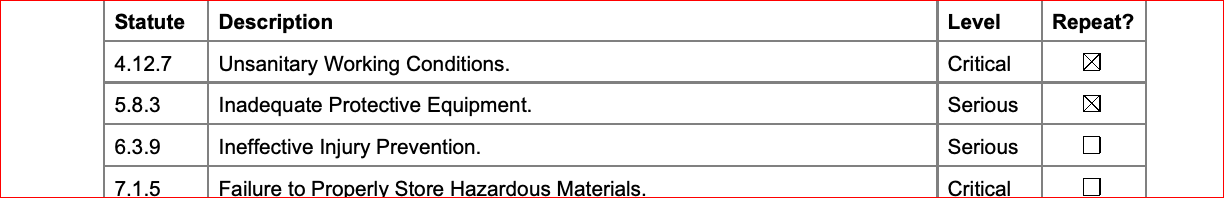

In [8]:
# Find a region of interest
table_header = page.find('text:contains("Statute")')
table_region = table_header.below(height=100)

# Visualize the region
table_region.show(color="purple", label="Table Region")

# Create an image of just this region
table_region.to_image(resolution=150)

Regions allow you to precisely target specific parts of a document for extraction and analysis. They're essential for handling complex document layouts and isolating the exact content you need. 